# Предсказание функции синус

In [221]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [222]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Тренировочное множество

В качестве входных значений создадим тензор из случайных чисел размерностью 100. 

Text(0.5, 1.0, '$y = sin(x)$')

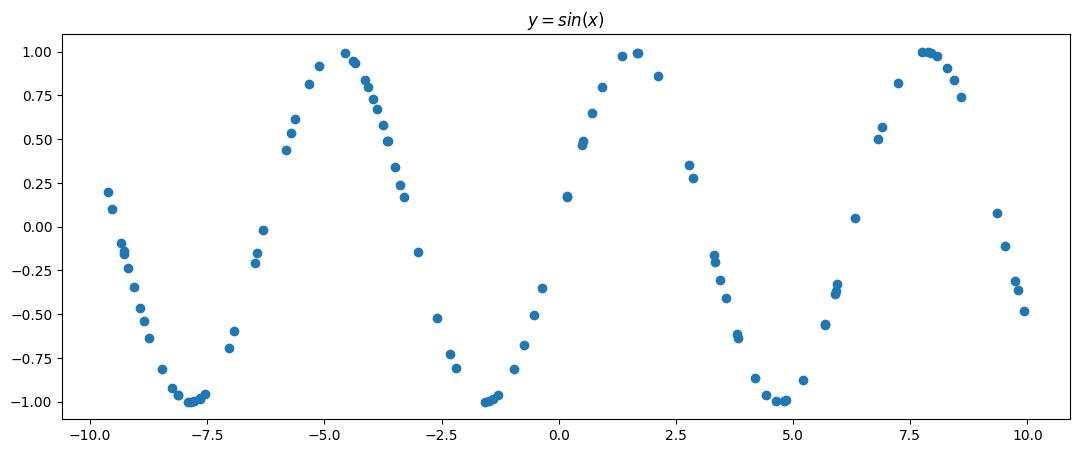

In [223]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$')

Проверим размерности тренировочного множества и целевых значений: 

In [224]:
print(x_train.size(), y_train.size())

torch.Size([100]) torch.Size([100])


Создадим случайным образом шум для выходных значений:

Text(0.5, 1.0, 'Gaussian noise')

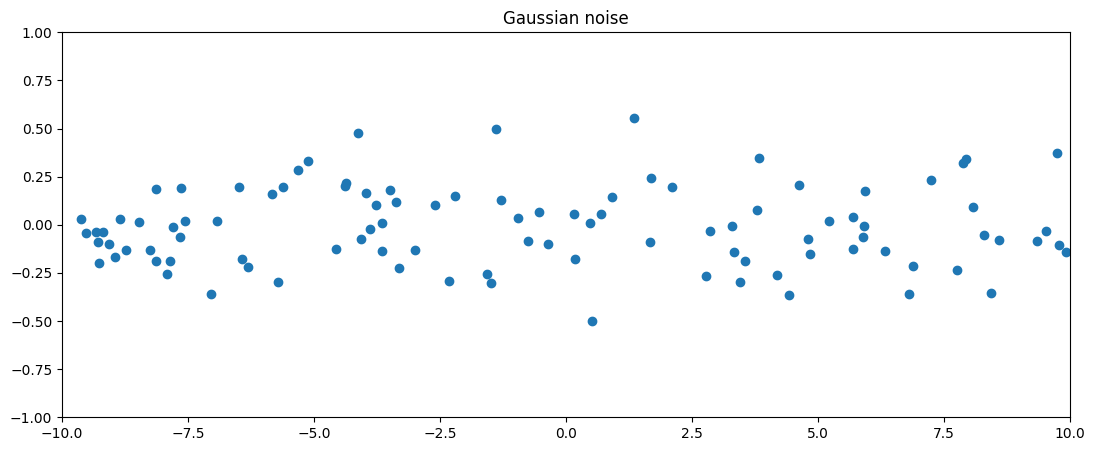

In [225]:
noise = torch.randn((y_train.shape)) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

Добавим этот шум к выходным значениям:

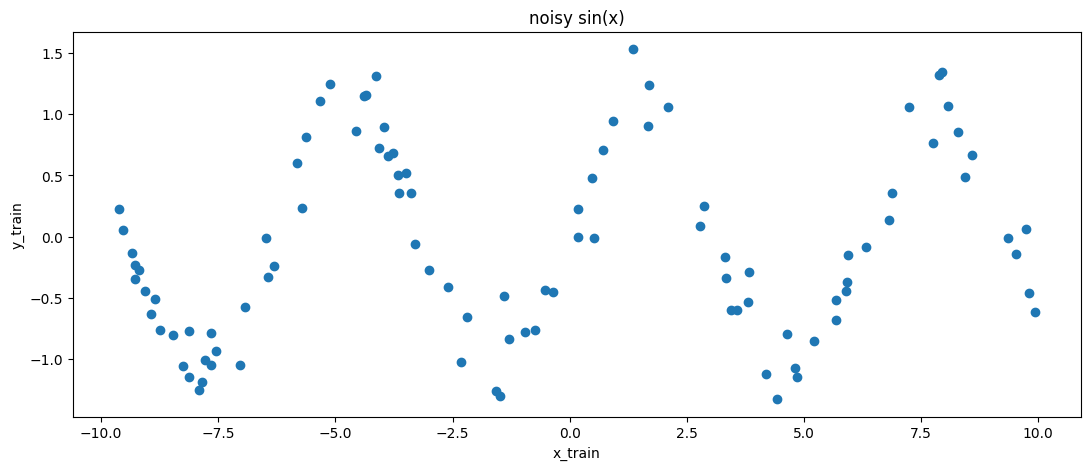

In [226]:
y_train += noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

Добавим ещё по одному одиничному измерению для входных и целевых данных на 1е место:

In [227]:
x_train = torch.unsqueeze(x_train, -1)
y_train = torch.unsqueeze(y_train, -1)

Проверим полученные размерности:

In [228]:
print(x_train.size(), y_train.size())

torch.Size([100, 1]) torch.Size([100, 1])


# Проверочное множество

Зададим проверочные данные как вектор длины 100 со значениями из отрезка [-10; 10].

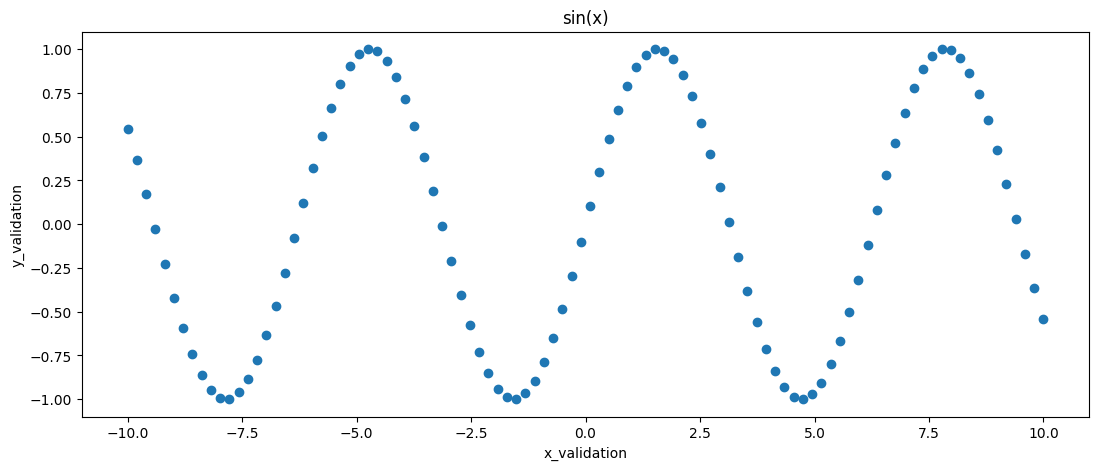

In [229]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

Также добавим ещё по одному одиничному измерению для входных и целевых данных на 1е место:

In [230]:
x_validation = torch.unsqueeze(x_validation, -1)
y_validation = torch.unsqueeze(y_validation, -1)

# Создание модели

Модель будет состоять из входного слоя, функции активации сигмоид и выходного слоя, на выходе мы хотим получить всего одно значение.

In [231]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

Создадим экземпляр класса с тремя нейронами на скрытом слое:

In [232]:
sine_net = SineNet(3)

# Функция предсказаний и вывода результатов на экран

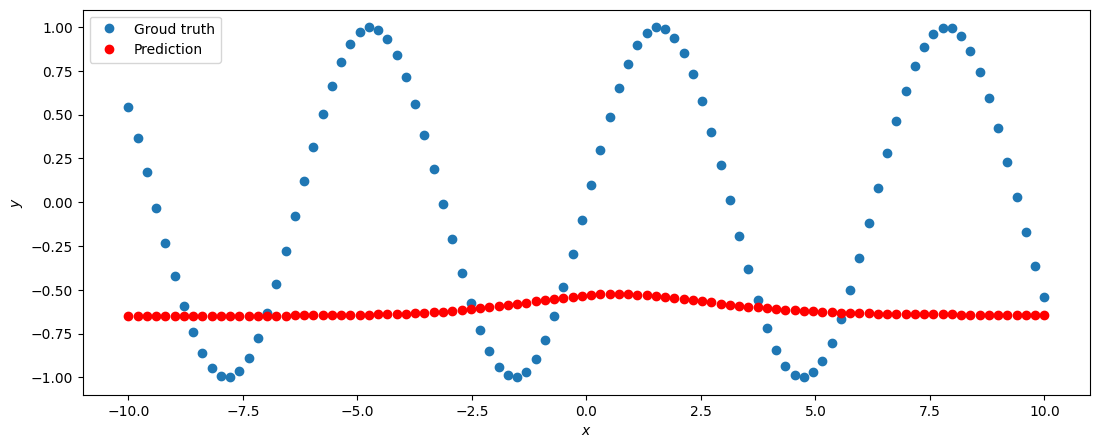

In [233]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

# Оптимизатор

Будем использовать Adam с шагом обучения 0,01.

In [234]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr = 0.01)

# Функция потерь

Будем использовать среднюю квадратичную ошибку в качестве функции потерь:

In [235]:
loss = torch.nn.MSELoss()

# Тренировка модели

Epoch: 99, MSE = 0.5507148504257202
Epoch: 199, MSE = 0.5358471870422363
Epoch: 299, MSE = 0.5198489427566528
Epoch: 399, MSE = 0.49834349751472473
Epoch: 499, MSE = 0.46456822752952576
Epoch: 599, MSE = 0.43388831615448
Epoch: 699, MSE = 0.40815648436546326
Epoch: 799, MSE = 0.38865551352500916
Epoch: 899, MSE = 0.375051885843277
Epoch: 999, MSE = 0.36594292521476746
Epoch: 1099, MSE = 0.3598940372467041
Epoch: 1199, MSE = 0.35581934452056885
Epoch: 1299, MSE = 0.3529903292655945
Epoch: 1399, MSE = 0.3509434163570404
Epoch: 1499, MSE = 0.3493911325931549
Epoch: 1599, MSE = 0.34815680980682373
Epoch: 1699, MSE = 0.34713250398635864
Epoch: 1799, MSE = 0.3462522625923157
Epoch: 1899, MSE = 0.345475435256958
Epoch: 1999, MSE = 0.3447767496109009


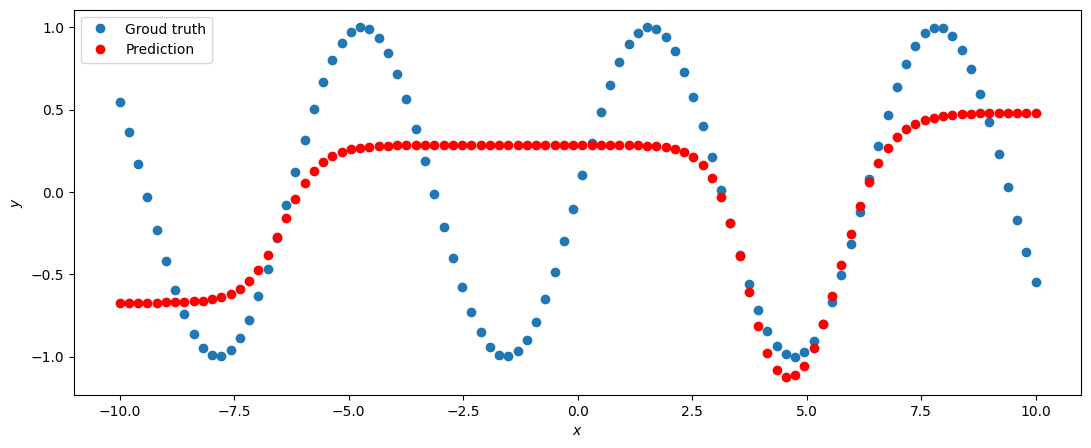

In [236]:
for epoch_index in range(2000):
    sine_net.train()
    optimizer.zero_grad()

    y_pred = sine_net(x_train)
    loss_val = loss(y_train, y_pred)

    loss_val.backward() 
    optimizer.step() 

    if epoch_index % 100 == 99:
        print(f'Epoch: {epoch_index}, MSE = {loss_val.item()}') 

predict(sine_net, x_validation, y_validation)